# import library

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# membaca image

In [2]:
img = cv2.imread("foto_diri.jpg")

# membuat baris dan kolom

In [3]:
img.shape

(4624, 2604, 3)

In [4]:
[baris, kolom] = img.shape[:2]

# konversi image dari BGR ke RGB

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# median filter menggunakan openCV

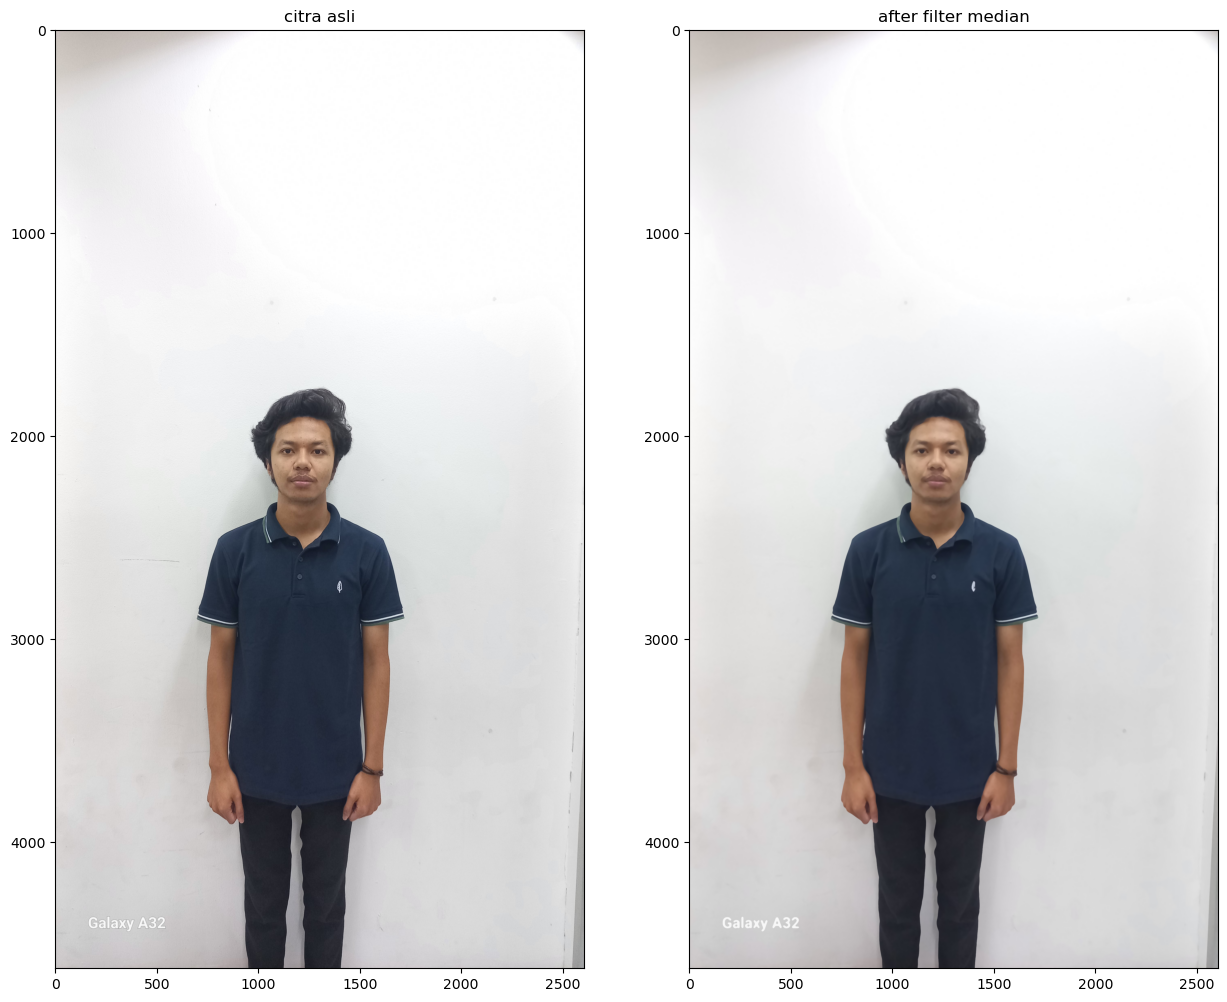

In [6]:
img_median = img.copy()
img_median_after = cv2.medianBlur(img_median, 11)

fig, axis = plt.subplots(1, 2, figsize = (15, 15))
ax = axis.ravel()

ax[0].imshow(img_median, cmap='gray')
ax[0].set_title('citra asli')

ax[1].imshow(img_median_after, cmap='gray')
ax[1].set_title('after filter median')
plt.show()

# konversi image dari RGB ke GRAY untuk menghitung mean

In [7]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# ketetanggan pixel

In [8]:
img_mean = img_gray.copy().astype(float)

m1, n1 = img_mean.shape
img_mean_after = np.empty([m1, n1])

print("shape image median : ", img_mean.shape)
print("shape image median after : ", img_mean_after.shape)

print("m1 : ", m1)
print("n1 : ", n1)
print()

shape image median :  (4624, 2604)
shape image median after :  (4624, 2604)
m1 :  4624
n1 :  2604



# membuat filter rata-rata secara manual

In [9]:
for baris in range (0, m1-1) :
    for kolom in range (0, n1-1) :
        a1 = baris
        b1 = kolom
        jumlah = img_mean[a1-1, b1-1] + img_mean[a1-1, b1] + img_mean[a1-1, b1+1] +\
            img_mean[a1, b1-1] + img_mean[a1, b1] + img_mean[a1, b1+1] +\
            img_mean[a1+1, b1-1] + img_mean[a1+1, b1] + img_mean[a1+1, b1+1]
        img_mean_after[a1, b1] = 1/9 * jumlah

# menampilkan image asli dan image setelah menggunakan filter mean

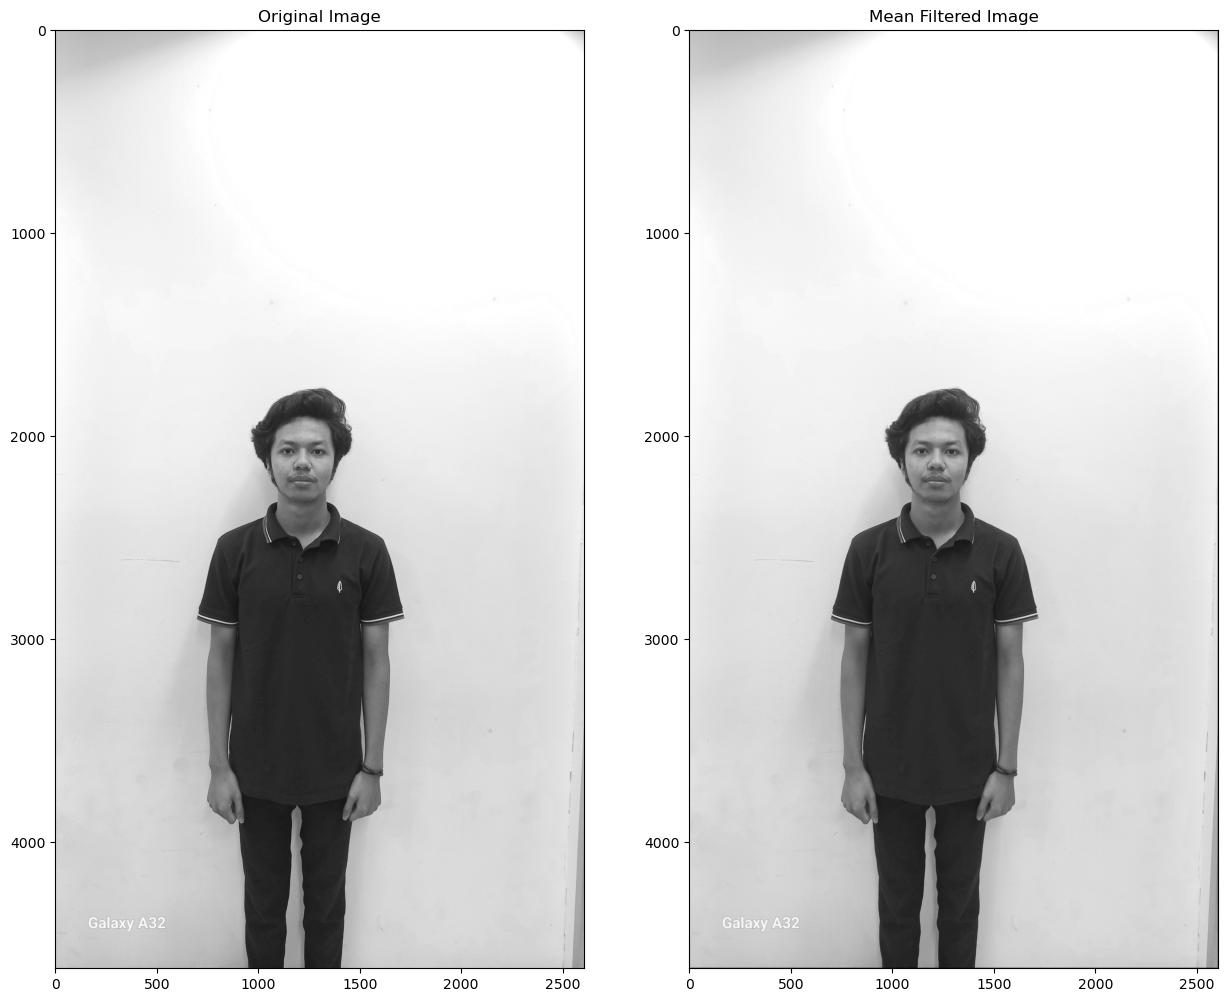

In [10]:
fig, axis = plt.subplots(1, 2, figsize = (15, 15))
ax = axis.ravel()

ax[0].imshow(img_mean, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(img_mean_after, cmap='gray')
ax[1].set_title('Mean Filtered Image')
plt.show()